In [0]:
import torch
import torchvision.datasets
import random
import numpy as np

In [0]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
MNIST_train = torchvision.datasets.MNIST('/', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('/', download=True, train=False)

0it [00:00, ?it/s]

9920512it [00:05, 1807165.77it/s]                             


Extracting /MNIST/raw/train-images-idx3-ubyte.gz to /MNIST/raw


32768it [00:00, 319088.96it/s]                           
0it [00:00, ?it/s]

Extracting /MNIST/raw/train-labels-idx1-ubyte.gz to /MNIST/raw


1654784it [00:00, 5215946.60it/s]                           
8192it [00:00, 123068.49it/s]


Extracting /MNIST/raw/t10k-images-idx3-ubyte.gz to /MNIST/raw
Extracting /MNIST/raw/t10k-labels-idx1-ubyte.gz to /MNIST/raw
Processing...
Done!


In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels

X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
len(y_train), len(y_test)

(60000, 10000)

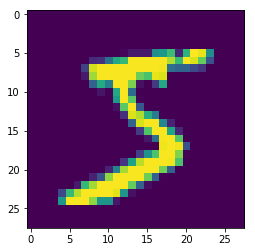

tensor(5)


In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [0]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [8]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [0]:
class LeNet5Mod(torch.nn.Module):
  def __init__(self,
               activation='tanh', 
               pooling='avg',
               conv_size=5, 
               use_batch_norm=False):
    super().__init__()
    self.conv_size = conv_size
    self.use_batch_norm = use_batch_norm
    
    if activation == 'tanh':
      activation_function = torch.nn.Tanh()
    elif activation == 'relu':
      activation_function = torch.nn.ReLU()
    else:
      raise 'Just make sasai'
      
    if pooling == 'avg':
      pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    elif pooling == 'max':
      pooling_layer = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    else:
      raise 'Just make sasai'
      
# start description
      
    if conv_size == 5:
      self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
    elif conv_size == 3:
      self.conv1_1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1)
      self.conv1_2 = torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1)
    else:
      raise 'Just make sasai'
      
    self.act1 = activation_function
    self.bn1 = torch.nn.BatchNorm2d(num_features=6)
    self.pool1 = pooling_layer
    
    if conv_size == 5:
      self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
    elif conv_size == 3:
      self.conv2_1 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=0)
      self.conv2_2 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=0)
    else:
      raise 'Just make sasai'
      
    self.act2 = activation_function
    self.bn2 = torch.nn.BatchNorm2d(num_features=16)
    self.pool2 = pooling_layer
    
    if conv_size == 5:
      self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, padding=0)
    elif conv_size == 3:
      self.conv3_1 = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=3, padding=0)
      self.conv3_2 = torch.nn.Conv2d(in_channels=120, out_channels=120, kernel_size=3, padding=0)
    else:
      raise 'Just make sasai'
      
    self.act3 = activation_function
    self.bn3 = torch.nn.BatchNorm2d(num_features=120)
    self.pool3 = pooling_layer
    
    self.fc1 = torch.nn.Linear(120, 84)
    self.act4 = activation_function
    
    self.fc2 = torch.nn.Linear(84, 10)
    
    self.sm = torch.nn.Softmax()
    
  def forward(self, x):
    if self.conv_size == 5:
      x = self.conv1(x)
    elif self.conv_size == 3:
      x = self.conv1_1(x)
      X = self.conv1_2(x)
      
    x = self.act1(x)
      
    if self.use_batch_norm:
      x = self.bn1(x)
    x = self.pool1(x)
    
    if self.conv_size == 5:
      x = self.conv2(x)
    elif self.conv_size == 3:
      x = self.conv2_1(x)
      x = self.conv2_2(x)
      
    x = self.act2(x)
    
    if self.use_batch_norm:
      x = self.bn2(x)
      
    x = self.pool2(x)
    
    if self.conv_size == 5:
      x = self.conv3(x)
    elif self.conv_size == 3:
      x = self.conv3_1(x)
      x = self.conv3_2(x)
      
    x = self.act3(x) 
    
    if self.use_batch_norm:
      x = self.bn3(x)
      
#     x = self.pool3(x)
    
    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    
    x = self.fc1(x)
    x = self.act4(x)
    x = self.fc2(x)
    return x
    
    
# le_net5_mod = LeNet5Mod()
    

In [0]:
def train(net, X_train, y_train, X_test, y_test):
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  net = net.to(device)
  
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
  
  batch_size = 100
  
  test_accuracy_history = []
  test_loss_history = []
  
  X_test = X_test.to(device)
  y_test = y_test.to(device)
  
  for epoch in range(30):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
      optimizer.zero_grad()
      net.train()
      
      batch_indices = order[start_index: start_index+batch_size]
      
      X_batch = X_train[batch_indices].to(device)
      y_batch = y_train[batch_indices].to(device)
      
      y_pred = net.forward(X_batch)
      
      loss_value = loss(y_pred, y_batch)
      loss_value.backward()
      
      optimizer.step()
      
    net.eval()
    
    test_preds = net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)
    
  print('-------------------')
  return test_accuracy_history, test_loss_history

In [53]:
accuracies = {}
losses = {}

accuracies['tanh_5'], losses['tanh_5'] = train(LeNet5Mod(activation='tanh', 
                                                         conv_size=5),
                                               X_train, y_train,
                                               X_test, y_test)

accuracies['tnah_3'], losses['tanh_3'] = train(LeNet5Mod(activation='tanh',
                                                         conv_size=3),
                                               X_train, y_train, 
                                               X_test, y_test)

accuracies['relu_5'], losses['relu_5'] = train(LeNet5Mod(activation='relu', 
                                                         conv_size=5), 
                                               X_train, y_train, 
                                               X_test, y_test)

accuracies['relu_3'], losses['relu_3'] = train(LeNet5Mod(activation='relu', 
                                                         conv_size=3), 
                                               X_train, y_train, 
                                               X_test, y_test)

accuracies['relu_5_maxp'], losses['relu_5_maxp'] = train(LeNet5Mod(activation='relu', 
                                                                   conv_size=5,
                                                                   pooling='max'),
                                                         X_train, y_train, 
                                                         X_test, y_test)

accuracies['relu_3_maxp'], losses['relu_3_maxp'] = train(LeNet5Mod(activation='relu', 
                                                                   conv_size=3,
                                                                   pooling='max'),
                                                         X_train, y_train, 
                                                         X_test, y_test)

accuracies['relu_5_maxp_bn'], losses['relu_5_maxp_bn'] = train(LeNet5Mod(activation='relu', 
                                                                         conv_size=5,
                                                                         pooling='max',
                                                                         use_batch_norm=True),
                                                               X_train, y_train, 
                                                               X_test, y_test)

accuracies['relu_3_maxp_bn'], losses['relu_3_maxp_bn'] = train(LeNet5Mod(activation='relu', 
                                                                         conv_size=3,
                                                                         pooling='max',
                                                                         use_batch_norm=True),
                                                               X_train, y_train, 
                                                               X_test, y_test)


tensor(0.9793)
tensor(0.9808)
tensor(0.9846)
tensor(0.9840)
tensor(0.9890)
tensor(0.9880)
tensor(0.9885)
tensor(0.9889)
tensor(0.9885)
tensor(0.9861)
tensor(0.9901)
tensor(0.9884)
tensor(0.9880)
tensor(0.9882)
tensor(0.9870)
tensor(0.9867)
tensor(0.9858)
tensor(0.9891)
tensor(0.9886)
tensor(0.9877)
tensor(0.9889)
tensor(0.9903)
tensor(0.9894)
tensor(0.9899)
tensor(0.9901)
tensor(0.9888)
tensor(0.9885)
tensor(0.9903)
tensor(0.9899)
tensor(0.9883)
-------------------
tensor(0.9744)
tensor(0.9807)
tensor(0.9844)
tensor(0.9838)
tensor(0.9861)
tensor(0.9865)
tensor(0.9859)
tensor(0.9868)
tensor(0.9855)
tensor(0.9861)
tensor(0.9864)
tensor(0.9864)
tensor(0.9880)
tensor(0.9862)
tensor(0.9862)
tensor(0.9794)
tensor(0.9839)
tensor(0.9870)
tensor(0.9845)
tensor(0.9881)
tensor(0.9864)
tensor(0.9881)
tensor(0.9844)
tensor(0.9847)
tensor(0.9866)
tensor(0.9867)
tensor(0.9856)
tensor(0.9870)
tensor(0.9860)
tensor(0.9871)
-------------------
tensor(0.9800)
tensor(0.9873)
tensor(0.9898)
tensor(0.9900)


In [54]:
accuracies

{'relu_3': [tensor(0.9771),
  tensor(0.9833),
  tensor(0.9852),
  tensor(0.9859),
  tensor(0.9848),
  tensor(0.9858),
  tensor(0.9883),
  tensor(0.9885),
  tensor(0.9881),
  tensor(0.9860),
  tensor(0.9903),
  tensor(0.9891),
  tensor(0.9866),
  tensor(0.9864),
  tensor(0.9882),
  tensor(0.9895),
  tensor(0.9892),
  tensor(0.9877),
  tensor(0.9894),
  tensor(0.9901),
  tensor(0.9897),
  tensor(0.9905),
  tensor(0.9887),
  tensor(0.9885),
  tensor(0.9899),
  tensor(0.9907),
  tensor(0.9882),
  tensor(0.9876),
  tensor(0.9886),
  tensor(0.9919)],
 'relu_3_maxp': [tensor(0.9754),
  tensor(0.9836),
  tensor(0.9858),
  tensor(0.9829),
  tensor(0.9833),
  tensor(0.9873),
  tensor(0.9847),
  tensor(0.9868),
  tensor(0.9868),
  tensor(0.9876),
  tensor(0.9885),
  tensor(0.9896),
  tensor(0.9851),
  tensor(0.9873),
  tensor(0.9874),
  tensor(0.9898),
  tensor(0.9891),
  tensor(0.9890),
  tensor(0.9849),
  tensor(0.9887),
  tensor(0.9873),
  tensor(0.9892),
  tensor(0.9861),
  tensor(0.9876),
  

Text(0.5, 1.0, 'Val score')

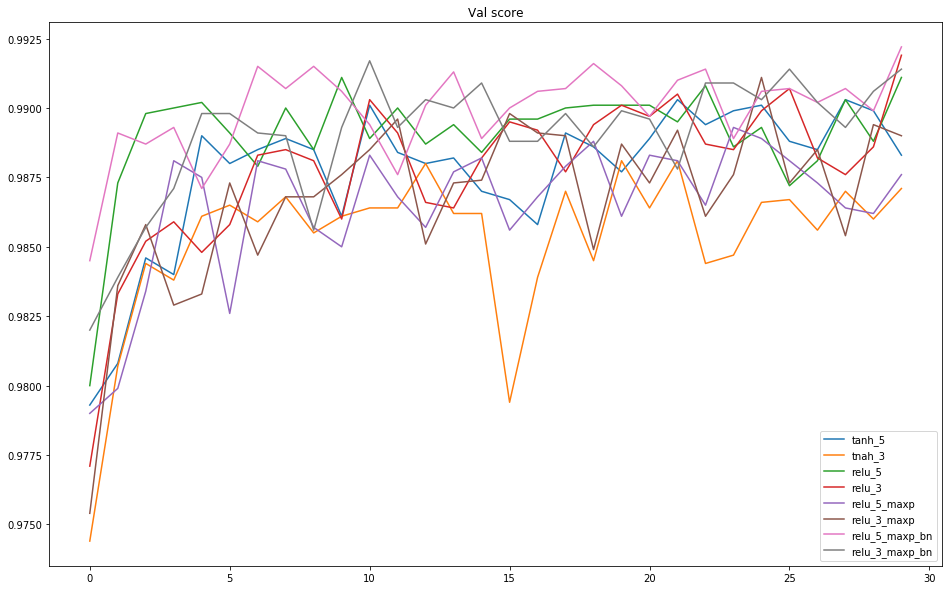

In [58]:
plt.figure(figsize=(16, 10))
for exp_id in accuracies.keys():
  plt.plot(accuracies[exp_id], label=exp_id)
plt.legend()
plt.title('Val score')

Text(0.5, 1.0, 'Loss')

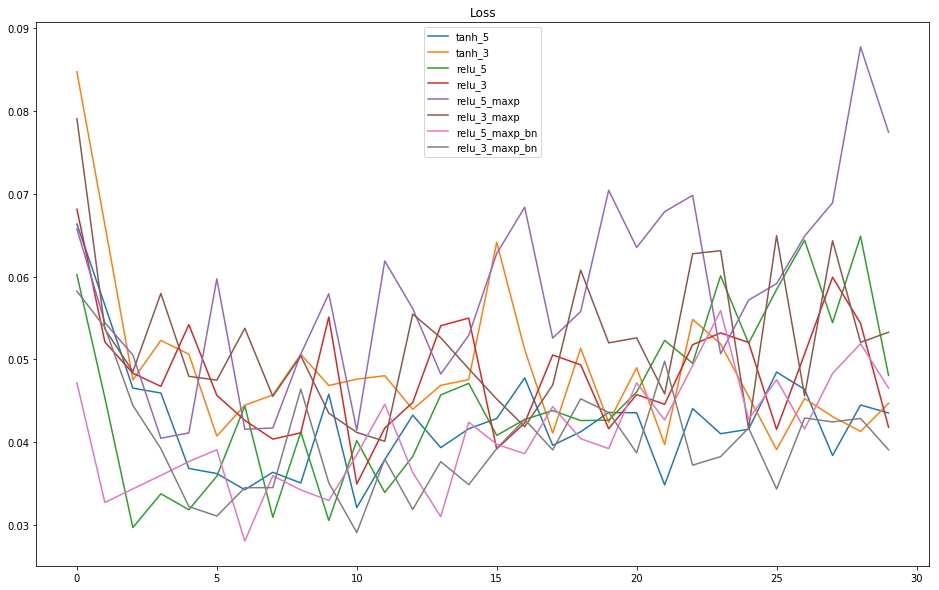

In [60]:
plt.figure(figsize=(16, 10))
for exp_id in losses.keys():
  plt.plot(losses[exp_id], label=exp_id)
plt.legend()
plt.title('Loss')